In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [37]:
iris_1 = datasets.load_iris(as_frame=True)
iris_1

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [28]:
iris = datasets.load_iris(as_frame=True)
description = iris.DESCR


iris = iris['data'].merge(iris['target'], left_index=True, right_index=True)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
"""cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

iris_list = []
for col in cols:
    iri = iris[col].unique()
    iris_num = len(iri)
    iris_dict = {"categorical_variable":col,
                "number_of_possible_values":iris_num,
                "values":iri}
    iris_list.append(iris_dict)
    
categories = pd.DataFrame(iris_dict).sort_values(by="number_of_possible_values",
                                                ascending=False).reset_index(drop=True)
categories"""

'cols = [\'sepal length (cm)\', \'sepal width (cm)\', \'petal length (cm)\', \'petal width (cm)\']\n\niris_list = []\nfor col in cols:\n    iri = iris[col].unique()\n    iris_num = len(iri)\n    iris_dict = {"categorical_variable":col,\n                "number_of_possible_values":iris_num,\n                "values":iri}\n    iris_list.append(iris_dict)\n    \ncategories = pd.DataFrame(iris_dict).sort_values(by="number_of_possible_values",\n                                                ascending=False).reset_index(drop=True)\ncategories'

In [22]:
#no hay nulos
iris.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [20]:
#corroboramos que no hay nulos, no hya missing DATA. 
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [21]:
missing_percentage(iris)

,column_name,percent_missing
sepal length (cm),sepal length (cm),0.0
sepal width (cm),sepal width (cm),0.0
petal length (cm),petal length (cm),0.0
petal width (cm),petal width (cm),0.0
target,target,0.0


In [30]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(iris)
scaled_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ],
       [0.30555556, 0.79166667, 0.11864407, 0.125     , 0.        ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333, 0.        ],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667, 0.        ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.45833333, 0.08474576, 0.        , 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667, 0.        ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667, 0.        ],
       [0.13888889, 0.41666667, 0.06779661, 0.        , 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        , 0.        ],
       [0.41666667, 0.83333333, 0.

In [31]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df.describe()

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.500000
std,0.230018,0.181611,0.299203,0.317599,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


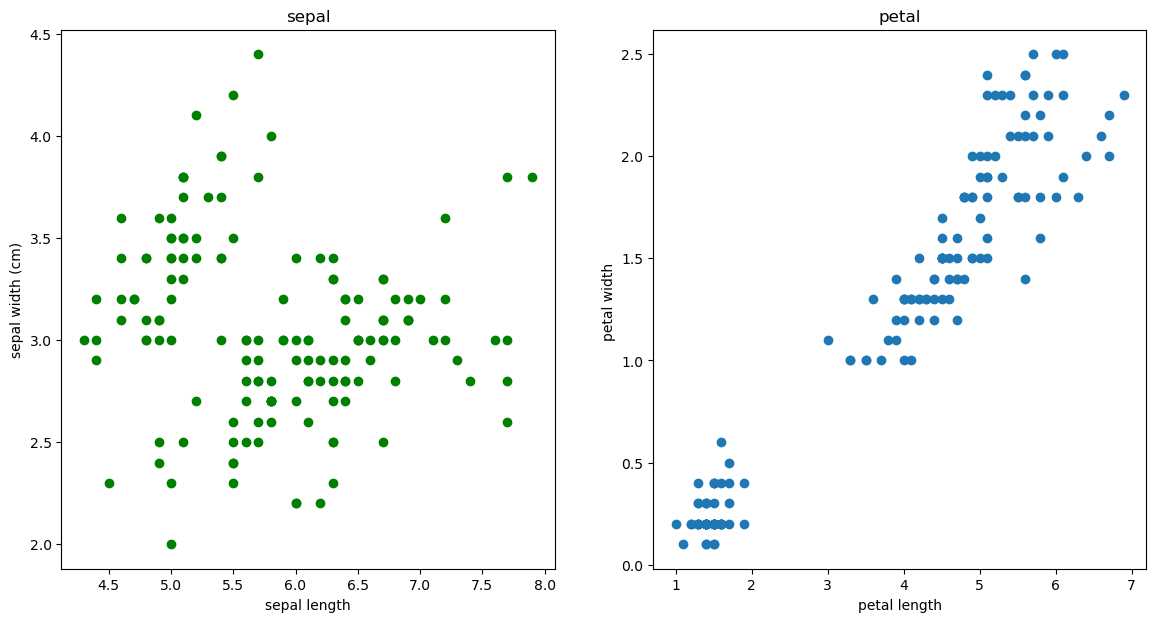

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c='green')
axs[0].set(xlabel='sepal length', ylabel='sepal width (cm)', title='sepal')
axs[1].scatter(iris['petal length (cm)'], iris['petal width (cm)'])
axs[1].set(xlabel='petal length', ylabel='petal width ', title='petal');

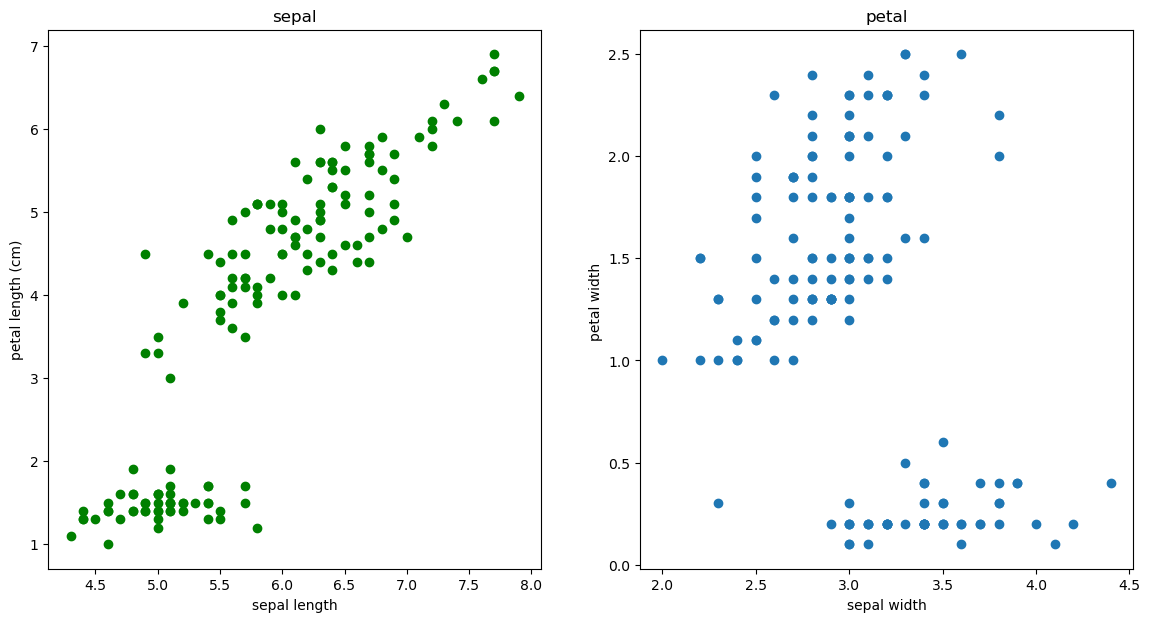

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(iris['sepal length (cm)'], iris['petal length (cm)'], c='green')
axs[0].set(xlabel='sepal length', ylabel='petal length (cm)', title='sepal')
axs[1].scatter(iris['sepal width (cm)'], iris['petal width (cm)'])
axs[1].set(xlabel='sepal width', ylabel='petal width ', title='petal');

In [33]:
#pearson
print(iris['petal length (cm)'].corr(iris['petal width (cm)'], method='pearson'))
print(iris['sepal length (cm)'].corr(iris['petal length (cm)'], method='pearson'))

0.9628654314027961
0.8717537758865831


In [34]:
# Spearman
print(iris['petal length (cm)'].corr(iris['petal width (cm)'], method='pearson'))
print(iris['sepal length (cm)'].corr(iris['petal length (cm)'], method='pearson'))

0.9628654314027961
0.8717537758865831


In [35]:
iris_correlation = iris.corr()
iris_correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000
